In [2]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Mecab

In [4]:
# 분석
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 딥러닝 tensorflow 세트
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Embedding
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
# 데이터 로딩
train_data0 = pd.read_csv("./data/bank_app_reviews_train.csv")

In [6]:
# 불용어 제거, 공백 정규화
import re

def clean_text(text):
    cleaned=re.sub(r'[^가-힣a-zA-Z0-9\s]','',text)
    cleaned=re.sub(r'\s+', ' ', cleaned)
    return cleaned.strip()

train_data0['사용자리뷰'] = train_data0['사용자리뷰'].apply(clean_text)

In [7]:
# 이진 감정 라벨
train_data0['is_good'] = train_data0['평점'].apply(lambda x: 1 if x >= 4 else 0)

In [8]:
## 전처리 및 시퀀스
# Mecab(형태소 분석기)로 토큰화
from konlpy.tag import Mecab
mecab = Mecab()
tokenized_docs = train_data0['사용자리뷰'].apply(mecab.morphs) # d0d이부분이 바로 이해되지 않음


In [ ]:

token= Tokenizer(lower=False)
token.fit_on_text(tokenized_docs)


In [ ]:
# 벡터화 - 동일한 변수를 가져오는것의 중요성 () 인덱스를 찾아오기 위해서)

In [10]:
!pip install sklearn

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [9]:
import joblib

In [ ]:
# 11에서 가져왔던 값 (token, max_length 써먹기)
#joblib.dump(token, "./model/bank_app_tokenizer.joblib")

# 모델 불러와서 예측하고 결과 비교
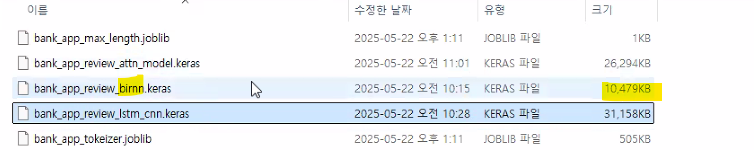
정확도가 같다면 어떤 모델을 쓸건지 - 빠른 결과가 나오는 쪽

In [ ]:
birnn_best = load_model("./model/bank_app_review_birnn.keras")
cnn_lstm_best = load_model("./model/bank_app_review_lstm_cnn.keras")
attn_best = load_model("./model/bank")

In [ ]:
birnn_pred = birnn_best.predict(X_padded)
cnn_latm_pred=cnn_lstm_best.predict(X_padded)
attn_pred = attn_best.predict(X_padded)

In [ ]:
pd.DataFrame(y)

In [11]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(birnn_result['is_good'].birnn_result[0]))

In [ ]:
attn_pred_result